# Data cleaning, transformations, & versioning

Most of the datasets we've worked with to this point were error-free and didn't require much, if any alterations before use.
However, real world data frequently needs some "correction" before use.
In this session, we will review some of the tecnhiques we've already used and add some more to our toolkit.
It's important to evaluate a dataset with respect to its unique properties as well the intended analyses before deciding on a strategy for cleaning or transformation.

## Missing data

Missing data occurs when, for whatever reason, the variable wasn't measured for a datapoint.
Ideally this is represented in the data using `na` or `nan`.
However, there is no universal convention for representing missing data.
You will find datasets that use blanks, `?`, or even `0` to represent a missing value.
`pandas` will recognize the following by default as `nan` when reading a CSV file: `-1.#IND`, `1.#QNAN`, `1.#IND`, `-1.#QNAN`, `#N/A N/A`, `#N/A`, `N/A`, `n/a`, `NA`, `<NA>`, `#NA`, `NULL`, `null`, `NaN`, `-NaN`, `nan`, `-nan`, and ` `.
Any other value for a missing value will not be recognized as such, *unless* you specifically tell `pandas` what to do.
Let's look at an example:

- `import pandas as pd`

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="importAs" id="Q%nZ$%KG#|1A:4A9|%=4" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="Nzt=g[pEt(%l}kD/){CM">pd</field></block></xml>

Read a CSV file with `?`:

- `with pd do read_csv using` a list containing 
    - `"datasets/na1.csv"`

In [3]:
pd.read_csv('datasets/na1.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="varDoMethod" id="$H{xNI|kNqoMLM:WQcnG" x="-2" y="188"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="vfmc#;~@iCRn]pop|E!."><mutation items="1"></mutation><value name="ADD0"><block type="text" id="x*n?Ou,?ya:,$o4^+h/I"><field name="TEXT">datasets/na1.csv</field></block></value></block></value></block></xml>

,x1,x2
0,1,2
1,?,3
2,3,2
3,5,?


Now try again, but telling `pandas` that `?` is `NaN`:

- Create variable `dataframe`
- Set it to `with pd do read_csv using` a list containing 
    - `"datasets/na1.csv"`
    - freestyle `na_values=["?"]`
- `dataframe` (to display)

In [5]:
dataframe = pd.read_csv('datasets/na1.csv', na_values=["?"])

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="E{sm{_%U%pPjUEi^FyLa" x="6" y="205"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="$H{xNI|kNqoMLM:WQcnG"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="vfmc#;~@iCRn]pop|E!."><mutation items="2"></mutation><value name="ADD0"><block type="text" id="x*n?Ou,?ya:,$o4^+h/I"><field name="TEXT">datasets/na1.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="8[U*$tAy7oUzB!Bh?gi."><field name="CODE">na_values=["?"]</field></block></value></block></value></block></value></block><block type="variables_get" id="gZACu7jWL#b5H^!Bj3#l" x="-2" y="300"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,1.0,2.0
1,NaN,3.0
2,3.0,2.0
3,5.0,NaN


It's important to note that it is incumbent on you to figure out what, if any, identifiers have been used in the data to indicate `NaN`, in order to specify them in this way.

Given that the data has some missing values, we need to decide what to do with them.
Many algorithms will balk on missing values, so we either need to drop datapoints with missing values or find a way to replace the missing values with a real value.

The first method, dropping the missing values, is something we've seen before:

- `with dataframe do dropna using`

In [8]:
dataframe.dropna()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="EgTd:Xz]e0WGIKLVW6Su" x="-2" y="188"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></xml>

,x1,x2
0,1.0,2.0
2,3.0,2.0


Sometimes we don't want to loose that data; we might be afraid that throwing out data like that biases the model.
An alternative is to replace the missing data with another convenient value.
Many values are possible, but common values are the mean and the median.
Here's an example using the median:

- `with dataframe do fillna using` a list containing `with dataframe do median using`

In [9]:
dataframe.fillna(dataframe.median())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="a{^j,Emwh+1yvNwG/KlX" x="26" y="221"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">fillna</field><data>dataframe:fillna</data><value name="INPUT"><block type="lists_create_with" id=";#!j6Tn)y[jxM5%RgI)r"><mutation items="1"></mutation><value name="ADD0"><block type="varDoMethod" id="U:YfBNm/s_p*r_{M1[uO"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">median</field><data>dataframe:median</data></block></value></block></value></block></xml>

,x1,x2
0,1.0,2.0
1,3.0,3.0
2,3.0,2.0
3,5.0,2.0


The median value of `x1` is `3.0`, and the median value of `x2` is `2.0`, so you can see that `NaN` has been replace by the median value *in each column*, i.e. for each variable.

It's important to note that there are [many other ways](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-missing-values-fillna) of removing or replacing missing values. 

## Transforming data

There are three common reasons to transform data:

- Outliers
- Common scale
- Non-normality

### Outliers

Outliers can exert undue influence on some models, like linear regression, when the models try to minimize mean squared error.
In general, the best way to deal with outliers is to try to understand the process that generated the outlier.
For example, perhaps the outlier is a meaurement error, in which case throwing that data out or transforming it would make sense.
Alternatively, it could be that the outlier is revealing real and important differences in the data that shouldn't be ignored.
One way to tell if outliers are "real" is to see if there are patterns in the outliers, e.g. in their relationships with other variables.

Assuming you've decided to drop the outliers, there are many ways try to determine what is an outlier and what isn't.
One way is to use *standard deviation*, a measure of the spread of a variable's values about its mean.
In normal distributions, 99.7% of the values are within three standard deviations, so three standard deviations is often used as a criteria for determining outliers.
The problem with this method is that mean and standard deviation are distorted by outliers, so using a criteria based on them means the criteria itself is distorted.

Another way we've seen in boxplots already.
Recall in boxplots that outliers are drawn as circles outside the whiskers of the plot.
Those whiskers are drawn at 1.5 times the interquartile range, or the difference between the 25th and 75th percentiles.
In normal distributions (without outliers), this method is almost identical to using three standard deviations, and when there are outliers, this method is unaffected because it is not based on the mean or standard deviation.

Finally, we can construct a simple version of both of these by just using percentiles, e.g. call everything below the 1st percentile or above the 99th percentile an outlier.
Let's try that now, but with a new dataset:

- Set `dataframe` to `with pd do read_csv using` a list containing `"datasets/outliers.csv"`
- `dataframe`

In [21]:
dataframe = pd.read_csv('datasets/outlier1.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="E{sm{_%U%pPjUEi^FyLa" x="6" y="205"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="$H{xNI|kNqoMLM:WQcnG"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="vfmc#;~@iCRn]pop|E!."><mutation items="1"></mutation><value name="ADD0"><block type="text" id="x*n?Ou,?ya:,$o4^+h/I"><field name="TEXT">datasets/outlier1.csv</field></block></value></block></value></block></value></block><block type="variables_get" id="gZACu7jWL#b5H^!Bj3#l" x="-2" y="300"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,0.20,0.10
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Let's start with the 1st percentile.
Here are the steps:

- Determine the first percentile's value (like `median`, for each column/variable)
- Determine if a given value is above that value
- Return a dataframe with `NaN` wherever it is not above the first percentile

Here are the first two steps:

- `dataframe` followed by `>` followed by `with dataframe do quantile using .01`

In [22]:
dataframe > dataframe.quantile(0.01)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="logic_compare" id="=?_NgH=BmwB0243gtD,5" x="57" y="256"><field name="OP">GT</field><value name="A"><block type="variables_get" id="Ym@x+}2^EAjzYBiZfyaP"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="dk{M-3FCA(CZ8TO(SURe"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="Bbr*#1B-cJ:Q2W{YE.Z="><field name="NUM">0.01</field></block></value></block></value></block></xml>

,x1,x2
0,False,False
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


Because `>` is logical, the result is True or False for each value.
We can accomplish the third step above by putting these blocks inside `dataframe[ ]`:

- `dataframe[ ]` containing
     - `dataframe` followed by `>` followed by `with dataframe do quantile using .01`

In [23]:
dataframe[(dataframe > dataframe.quantile(0.01))]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="indexer" id="}bF.d2[z2H@8rP0|K_I_" x="40" y="237"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id=".0TwlLk.3JZ.8#t|tL4G"><field name="OP">GT</field><value name="A"><block type="variables_get" id="3r.U,j72~)t9:?+nDjfR"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="]G;@sAmaEl8qS;HJwEa,"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="`fluf*zD(h#)dlrAs_2~"><field name="NUM">0.01</field></block></value></block></value></block></value></block></xml>

,x1,x2
0,NaN,NaN
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Both the 1st and 99th percentile can be turned into `NaN` by doing a transformation like this back to back:

- Set `dataframe` to `dataframe[ ]` containing
     - `dataframe` followed by `>` followed by `with dataframe do quantile using .01`
- Set `dataframe` to `dataframe[ ]` containing
     - `dataframe` followed by `<` followed by `with dataframe do quantile using .99`
- `dataframe`

In [20]:
dataframe = dataframe[(dataframe > dataframe.quantile(0.01))]
dataframe = dataframe[(dataframe < dataframe.quantile(0.99))]

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="3L^6HHG9`7r?P)PgAr?|" x="39" y="226"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="indexer" id="}bF.d2[z2H@8rP0|K_I_"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id=".0TwlLk.3JZ.8#t|tL4G"><field name="OP">GT</field><value name="A"><block type="variables_get" id="3r.U,j72~)t9:?+nDjfR"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="]G;@sAmaEl8qS;HJwEa,"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="`fluf*zD(h#)dlrAs_2~"><field name="NUM">0.01</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="u9.[8W,FP{++a!~mx+Mf"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="indexer" id="}2)muw]9HrIhPF2=}HR7"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id="EIXT~+|0P$W7S#_$;~T0"><field name="OP">LT</field><value name="A"><block type="variables_get" id="@F?qveQJMyb^z7Df|t^|"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="sx5bY[[)nz[(-OBPfD;9"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="##zUr(RrG30RP_fu38e`"><field name="NUM">0.99</field></block></value></block></value></block></value></block></value></block></next></block><block type="variables_get" id="@[F@|QX{[bzsfKO*i!7+" x="25" y="382"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,NaN,NaN
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Now we can use a `NaN` strategy like `dropna` or transforming `NaN` to another value.
Transforming to mean to median is not common in the case of outliers.
Instead, a common practice is to `clip` the data at the last permitted extreme value, e.g. the 1st or 99th percentile:

- Set `dataframe` to `with pd do read_csv using` a list containing `"datasets/outliers.csv"`
- `with dataframe do clip using` a list containing
    - `with dataframe do quantile using .01`
    - `with dataframe do quantile using .99`
    - freestyle `axis=1` (tells pandas to operate on columns, not rows)


In [27]:
dataframe = pd.read_csv('datasets/outlier1.csv')

dataframe.clip(dataframe.quantile(0.01), dataframe.quantile(0.99), axis=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="oJu2/6x4efA)W5CVK=(O" x="55" y="211"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="rhR%jn3}TK.+%+[8Gc*4"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="1kV)T_qQUOsJ}m$I$p5:"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="M)U|s6}0!XOS1BO3Rta*"><field name="TEXT">datasets/outlier1.csv</field></block></value></block></value></block></value></block><block type="varDoMethod" id="$~0OizzjcD]1F@r2vsLF" x="-150" y="295"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">clip</field><data>dataframe:clip</data><value name="INPUT"><block type="lists_create_with" id="9[244WK#|qrSR|hZJUmK"><mutation items="3"></mutation><value name="ADD0"><block type="varDoMethod" id="Y.@+JviQ4s3BeN6TlV6Z"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="V6:uOY*1rx?%RhbLf|6m"><field name="NUM">0.01</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="szU9Odub1,}izUraLutU"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="INPUT"><block type="math_number" id="3h3+sk?rCN-h!C|3Vdc%"><field name="NUM">0.99</field></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="O/HH_-P2QPm$7db4bX(b"><field name="CODE">axis=1</field></block></value></block></value></block></xml>

,x1,x2
0,0.3558,0.2824
1,1.0200,1.9200
2,1.0300,2.0000
3,1.0400,1.0600
4,1.1600,1.5300
5,1.3000,1.6600
6,1.3300,1.5300
7,1.3400,1.3000
8,1.3700,1.7500
9,1.3800,1.5000


### Common scale

Different variables will naturally be on different scales.
For example, `height` might range from 4 to 7 feet, but `weight` might range from 80 to 400 pounds.
Some models are very sensitive to these differences across variables and perform better when all the variables are on a common scale.
An example of this is lasso or ridge regression when a penalty is being applied across all variables.
Variables with larger scales absorb more of the penalty and prevent the penalty from acting as strongly on other variables.

The most often used common scale is the `standard deviation`, and we say that data on this scale has been **standardized.**
A standardized variable has a mean of zero and a standard deviation of 1, i.e. a standard deviation is 1 unit on the scale.
In `sklearn`, this can be accomplished with `StandardScaler` as we've previously seen in the context of pipelines.
However, it is also possible to apply it directly to data.

First, import the preprocessing library:

- `import sklearn.preprocessing as preprocessing`

In [29]:
import sklearn.preprocessing as preprocessing

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="[P^-!_^$F=Ygib|ngr@,">preprocessing</variable></variables><block type="importAs" id="]donCaX=TeUAuC1wmF3v" x="-44" y="288"><field name="libraryName">sklearn.preprocessing</field><field name="libraryAlias" id="[P^-!_^$F=Ygib|ngr@,">preprocessing</field></block></xml>

- Create variable `scaler`
- Set it to `with preprocessing create StandardScaler using`

In [30]:
scaler = preprocessing.StandardScaler()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{BFS9wkbZ7a4dkH]48ci">scaler</variable><variable id="[P^-!_^$F=Ygib|ngr@,">preprocessing</variable></variables><block type="variables_set" id="G9+8hbTW!}7tdqd?iLdK" x="-77" y="319"><field name="VAR" id="{BFS9wkbZ7a4dkH]48ci">scaler</field><value name="VALUE"><block type="varCreateObject" id="*ZL}f4^lTWBU+}oyYK@V"><field name="VAR" id="[P^-!_^$F=Ygib|ngr@,">preprocessing</field><field name="MEMBER">StandardScaler</field><data>preprocessing:StandardScaler</data></block></value></block></xml>

And `fit` and `transform` the data in one step:

- Create variable `standardized`
- Set it to `with scaler do fit_transform using` a list containing `dataframe`

This next part is just to put the result in a dataframe to make it pretty and use later:

- Set `standardized` to `with pd create DataFrame using` a list containing
    - `standardized`
    - freestyle `columns=["s1","s2"]`
- `standardized` (to display)

In [52]:
standardized = scaler.fit_transform(dataframe)
standardized = pd.DataFrame(standardized, columns=["s1","s2"])

standardized

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="yOhEcFMuTz-%rn1lPED3">standardized</variable><variable id="{BFS9wkbZ7a4dkH]48ci">scaler</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="9PlRG{Gj;=R^B]~to)/4" x="-98" y="237"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field><value name="VALUE"><block type="varDoMethod" id="Y;N9CPks,-_`d(NnaH8?"><field name="VAR" id="{BFS9wkbZ7a4dkH]48ci">scaler</field><field name="MEMBER">fit_transform</field><data>scaler:fit_transform</data><value name="INPUT"><block type="lists_create_with" id="w?;Whf)ALr#F.n|4c.ZG"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="6FFRJ,3`Ah3P%V;.gK(C"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value></block></value></block></value><next><block type="variables_set" id="x5|g(~$XrD~V-l}heWHG"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field><value name="VALUE"><block type="varCreateObject" id="JH):HxIGEuSTMZ()z-vs"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">DataFrame</field><data>pd:DataFrame</data><value name="INPUT"><block type="lists_create_with" id=";-Af1~b]4ugR].uu}rsY"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="{PykCxbOoq^rx0~ANZ^:"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="V1nAniGe9^l1^C;op$49"><field name="CODE">columns=["s1","s2"]</field></block></value></block></value></block></value></block></next></block><block type="variables_get" id="]U+D}`iDaJLesfF`_Zy8" x="-95" y="351"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field></block></xml>

,s1,s2
0,-1.538811,-1.528445
1,-0.606198,0.175027
2,-0.594825,0.249905
3,-0.583452,-0.629910
4,-0.446972,-0.190003
5,-0.287745,-0.068326
6,-0.253625,-0.190003
7,-0.242252,-0.405277
8,-0.208132,0.015912
9,-0.196759,-0.218082


Notice that the small and large values are still there - this is the unclipped dataframe that we have standardized.
A common misconception is that standardization makes the distribution normal, but this isn't true, and can be demonstrated with a plot:

- `import plotly.express as px`

In [35]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="importAs" id="Zq^c/BhiMuX?Od,m^$/)" x="-161" y="4"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="zZmWV$gHDceKnNTL0qJD">px</field></block></xml>

Create a figure of the first column of unstandardized data:

- Create variable `fig`
- Set it to `with px do histogram using` a list containing
    - `from dataframe get x1`

In [64]:
fig = px.histogram(dataframe.x1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Hl3{d8Vd1N{)P}/PayDc">fig</variable><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="_^)VF(]R?@|X56RoXHLr" x="-173" y="212"><field name="VAR" id="Hl3{d8Vd1N{)P}/PayDc">fig</field><value name="VALUE"><block type="varDoMethod" id="=EzF/rt6E([o:Td;tS{="><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="k?-H0kv-x_`iQ`QyDOg/"><mutation items="1"></mutation><value name="ADD0"><block type="varGetProperty" id="od|v`Uq%`o*x!8miqm(,"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">x1</field><data>dataframe:x1</data></block></value></block></value></block></value></block></xml>

Add the first column of standardized data:

- `with fig do add_histogram using` a list containing
    - freestyle `x=` followed by `from standarized get s1`
    - freestyle `name="s1"`

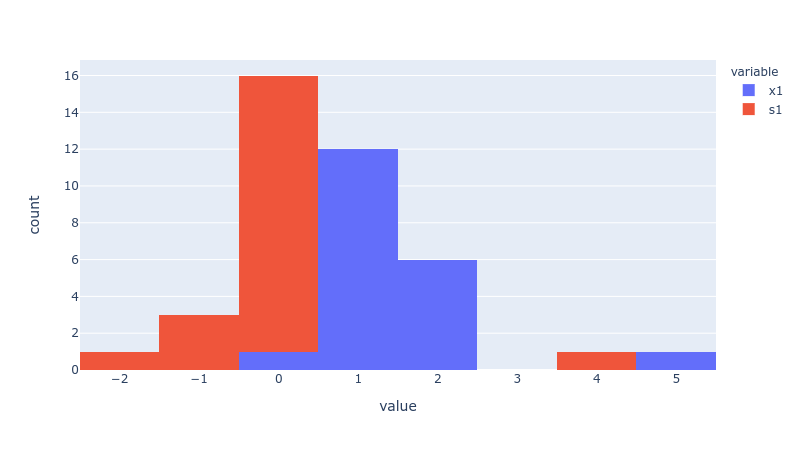

In [65]:
fig.add_histogram(x= (standardized.s1), name="s1")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Hl3{d8Vd1N{)P}/PayDc">fig</variable><variable id="yOhEcFMuTz-%rn1lPED3">standardized</variable></variables><block type="varDoMethod" id="QUFE#j}nIv)s12A(%PWQ" x="-94" y="259"><field name="VAR" id="Hl3{d8Vd1N{)P}/PayDc">fig</field><field name="MEMBER">add_histogram</field><data>fig:add_histogram</data><value name="INPUT"><block type="lists_create_with" id="D9[o3xFaA==R8j%cmvqb"><mutation items="2"></mutation><value name="ADD0"><block type="valueOutputCodeBlock" id="6=p]#FBp})/sO+sbY5[l"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="lucS:M@$H,fZ;23}n0NQ"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field><field name="MEMBER">s1</field><data>standardized:s1</data></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="FT!{x9~M)Y5+$/z2Q[{J"><field name="CODE">name="s1"</field></block></value></block></value></block></xml>

As you can see, the standardized variable is now centered on zero (i.e. shifted left) and had been "squeezed" slightly, but has the same essential shape.
It's important to recognize that standardization does not remove outliers!

### Non-normality

Non-normality is not necessarily a problem for many models.
However, some models, like linear regression, try to minimize sum squared error, and if the response variable (the thing you are trying to predict) is not normal-ish, it's unlikely that the residuals will be well behaved (i.e. symmetrically distributed around zero, as we saw in diagnostic plots).

Let's load up some data to transform:

- Set `dataframe` to `with pd do read_csv using` a list containing `"datasets/baseball.csv"`

In [118]:
dataframe = pd.read_csv('datasets/baseball.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="oJu2/6x4efA)W5CVK=(O" x="-166" y="216"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="rhR%jn3}TK.+%+[8Gc*4"><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="1kV)T_qQUOsJ}m$I$p5:"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="M)U|s6}0!XOS1BO3Rta*"><field name="TEXT">datasets/baseball.csv</field></block></value></block></value></block></value></block></xml>

`CRuns` is career runs, and is highly skewed:

- `with px do histogram using` a list containing
    - `dataframe[` `"CRuns"` `]`

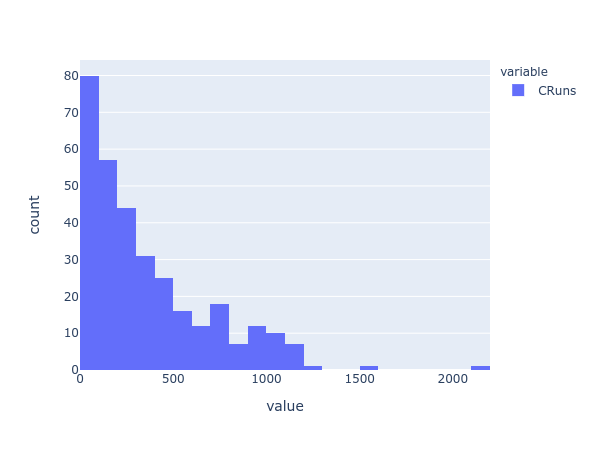

In [122]:
px.histogram(dataframe['CRuns'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="=EzF/rt6E([o:Td;tS{=" x="-93" y="283"><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="k?-H0kv-x_`iQ`QyDOg/"><mutation items="1"></mutation><value name="ADD0"><block type="indexer" id="z$d$$cj:$^4^D~Ox09X0"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id="AII!UIsFlvy4xpR28N%y"><field name="TEXT">CRuns</field></block></value></block></value></block></value></block></xml>

To transform the variable, we need to import `numpy`:

- `import numpy as np`

In [120]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="]r.MVxn$.B;84`lPo@#0">np</variable></variables><block type="importAs" id="405[o%Y^^u?jrH7uGE3H" x="50" y="96"><field name="libraryName">numpy</field><field name="libraryAlias" id="]r.MVxn$.B;84`lPo@#0">np</field></block></xml>

To plot log transformed `CRuns`:

- `with px do histogram using` a list containing
    - freestyle `np.log1p(dataframe["CRuns"])`

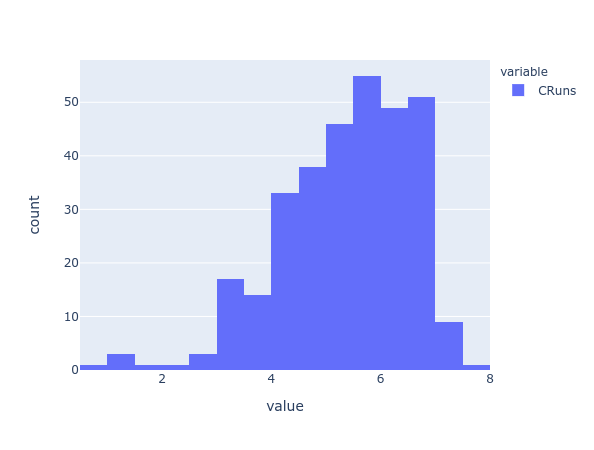

In [126]:
px.histogram(np.log1p(dataframe["CRuns"]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="varDoMethod" id="QUFE#j}nIv)s12A(%PWQ" x="-94" y="259"><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="D9[o3xFaA==R8j%cmvqb"><mutation items="1"></mutation><value name="ADD0"><block type="valueOutputCodeBlock" id="6=p]#FBp})/sO+sbY5[l"><field name="CODE">np.log1p(dataframe["CRuns"])</field></block></value></block></value></block></xml>

In this case, a log transform improved the shape of the distribution a lot. 
Another common transform is the square root, which tends to be a bit less powerful.
In general:

- If the distribution has a tail to the right (right skewed) use a root-type transformation (or log)
- If the distribution has a tail to the left (left skewed) use a power transformation



## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
